# **Lab02 - Regression**

**1.Import necessary libraries and packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2.Import the datasets**

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      31599 non-null  object 
 1   Property_Type           31599 non-null  object 
 2   Property_Area           31599 non-null  int64  
 3   Number_of_Windows       30266 non-null  float64
 4   Number_of_Doors         31599 non-null  int64  
 5   Furnishing              30771 non-null  object 
 6   Frequency_of_Powercuts  30490 non-null  float64
 7   Power_Backup            31599 non-null  object 
 8   Water_Supply            31599 non-null  object 
 9   Traffic_Density_Score   31599 non-null  float64
 10  Crime_Rate              30970 non-null  object 
 11  Dust_and_Noise          30600 non-null  object 
 12  Air_Quality_Index       31599 non-null  float64
 13  Neighborhood_Review     31599 non-null  float64
 14  Habitability_score      31599 non-null

**3. Dataset Analysis**

In [3]:
train_data.shape, test_data.shape

((31599, 15), (7900, 14))

In [4]:
train_data.head()

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


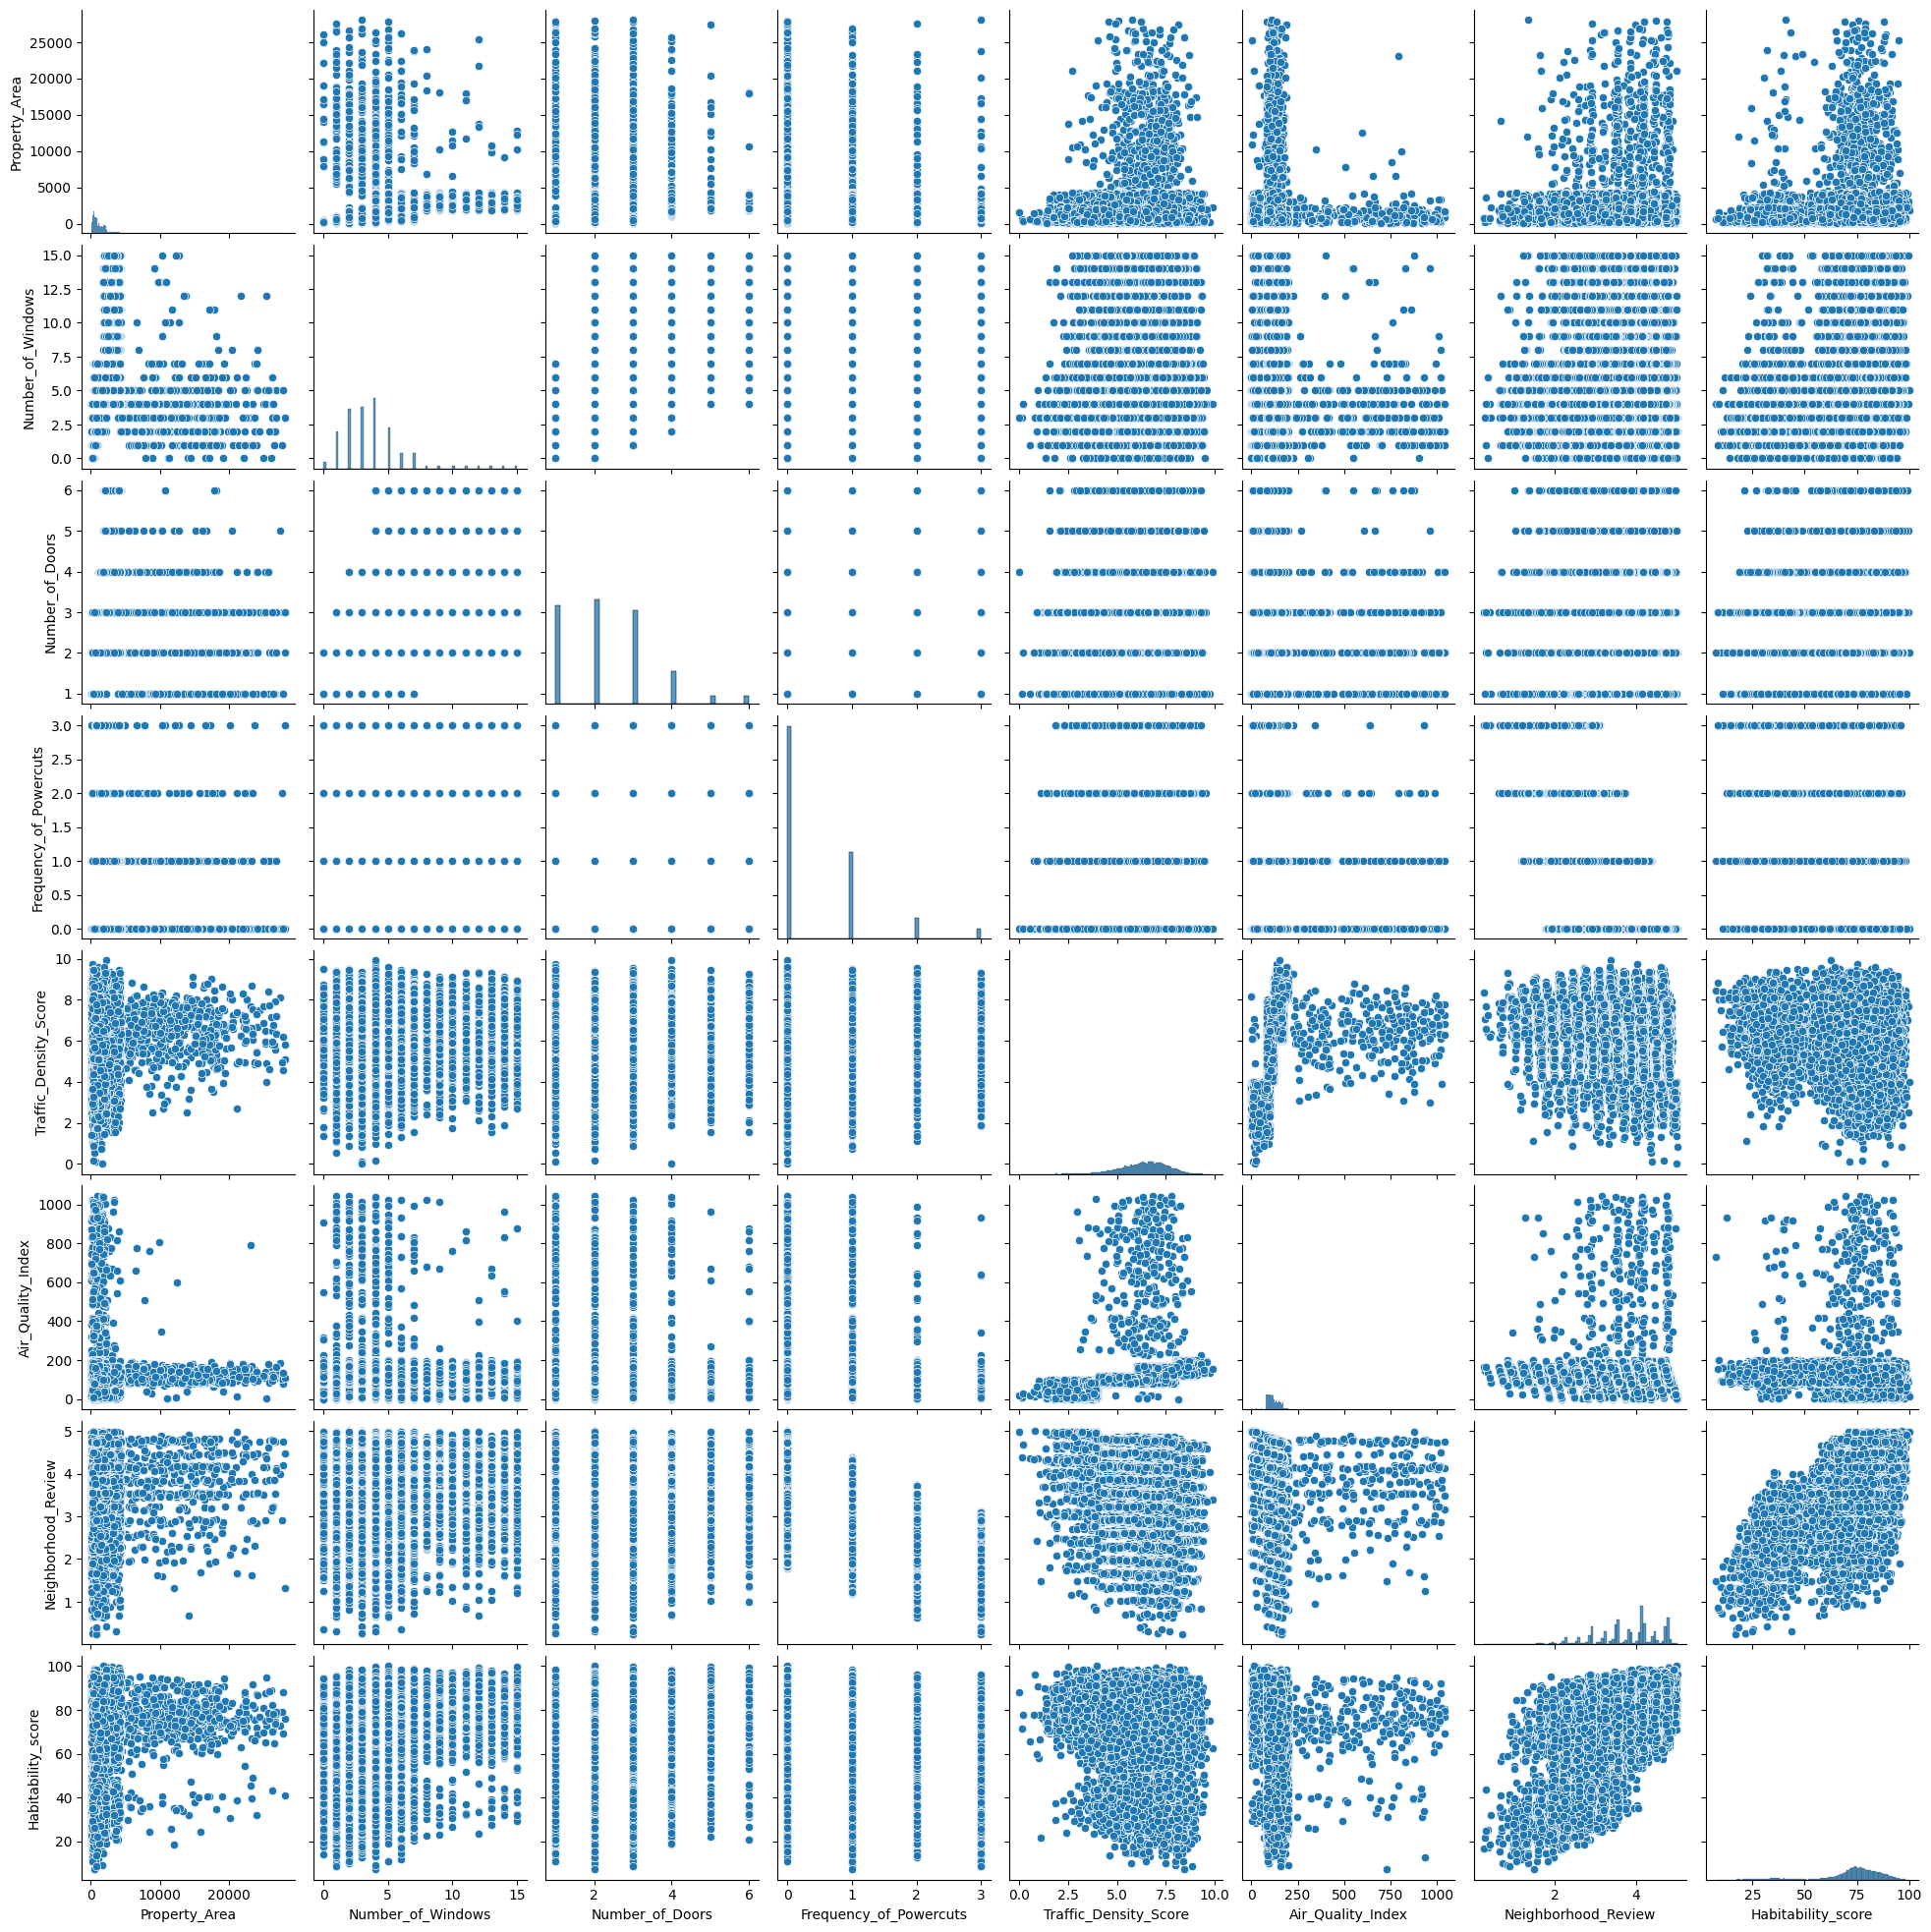

In [5]:
#Data visualization
sns.pairplot(train_data)
plt.show()

**4.Preprocessing the dataset**

In [6]:
# Calculate the percentage of missing values for each column in train_data
missing_percentages = (train_data.isnull().sum()/len(train_data))*100
missing_percentages.sort_values(ascending=False)

Number_of_Windows         4.218488
Frequency_of_Powercuts    3.509605
Dust_and_Noise            3.161492
Furnishing                2.620336
Crime_Rate                1.990569
Id                        0.000000
Property_Type             0.000000
Property_Area             0.000000
Number_of_Doors           0.000000
Power_Backup              0.000000
Water_Supply              0.000000
Traffic_Density_Score     0.000000
Air_Quality_Index         0.000000
Neighborhood_Review       0.000000
Habitability_score        0.000000
dtype: float64

In [7]:
# Calculate the percentage of missing values for each column in test_data
test_missing_percentages = (test_data.isnull().sum()/len(train_data))*100
test_missing_percentages.sort_values(ascending=False).head(60)

Number_of_Windows         1.015855
Frequency_of_Powercuts    0.867116
Dust_and_Noise            0.696225
Furnishing                0.677237
Crime_Rate                0.500016
Id                        0.000000
Property_Type             0.000000
Property_Area             0.000000
Number_of_Doors           0.000000
Power_Backup              0.000000
Water_Supply              0.000000
Traffic_Density_Score     0.000000
Air_Quality_Index         0.000000
Neighborhood_Review       0.000000
dtype: float64

**Here all the missing rates of data are less than 5%, so no need to eliminate the missing values. So the missing values need to be imputed with the suitable values**

In [3]:
#Selecting the numerical columns in the train_data
numerical_cols = train_data.select_dtypes(include=np.number).columns.tolist()
numerical_cols

['Property_Area',
 'Number_of_Windows',
 'Number_of_Doors',
 'Frequency_of_Powercuts',
 'Traffic_Density_Score',
 'Air_Quality_Index',
 'Neighborhood_Review',
 'Habitability_score']

In [4]:
test_numerical_cols = numerical_cols[:len(numerical_cols)-1]

In [5]:
#Impute the missing values in numerical data using the mean values
for col in test_numerical_cols:
    mean = train_data[col].mean()
    train_data[col].fillna(mean, inplace=True)
    test_data[col].fillna(mean, inplace=True)

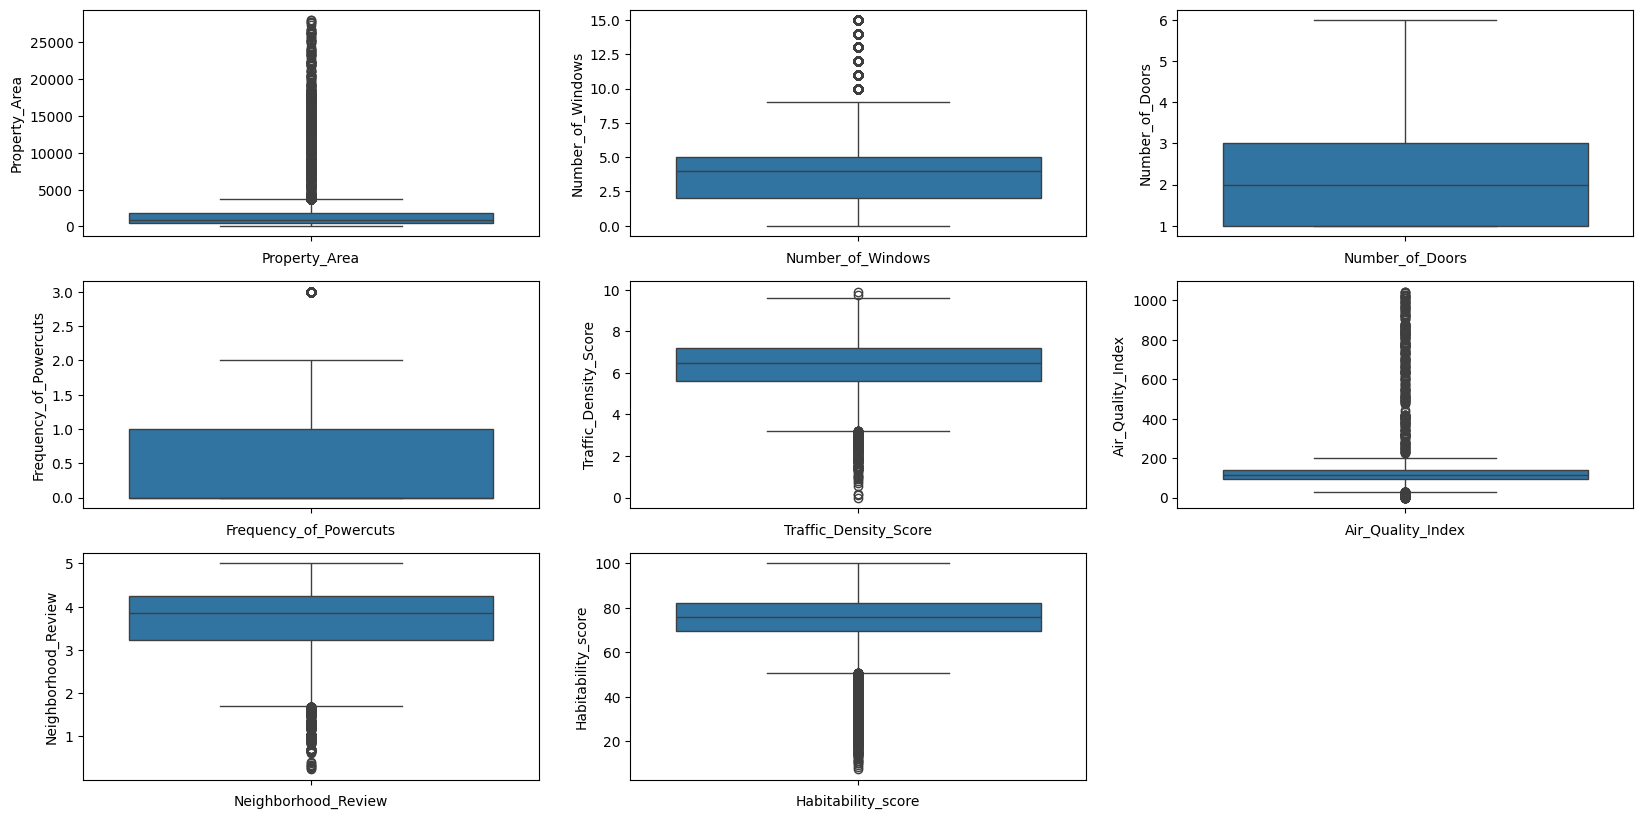

In [9]:
## Outlier visualization

#Visualize the disctrbution of outliers in numerical columns
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(train_data[col])
    plt.xlabel(col)

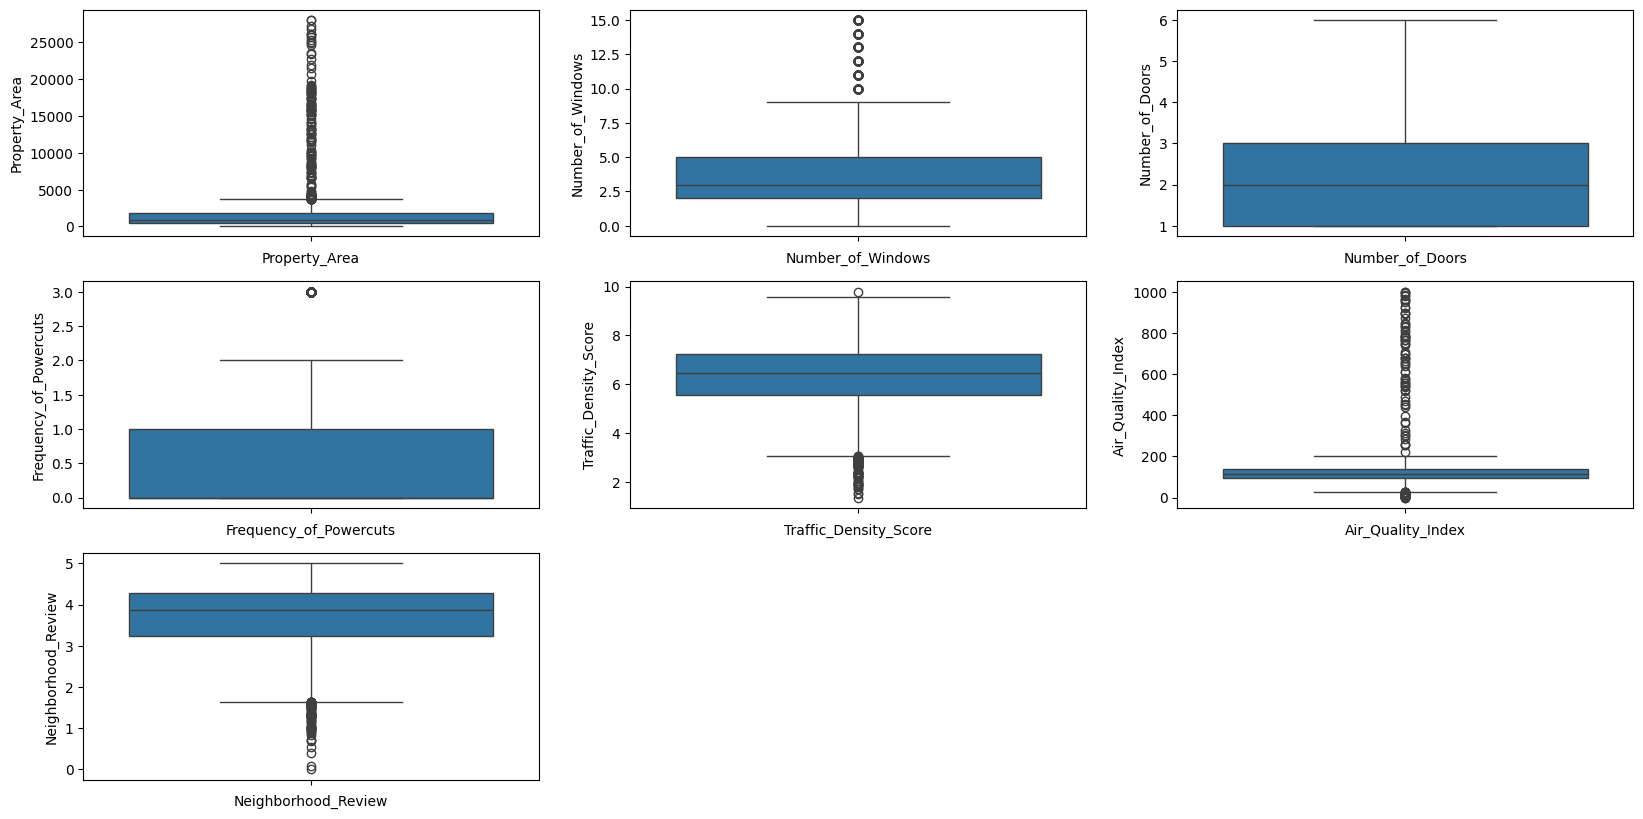

In [10]:
#Vsualize the distribution of outliers in test_data
plt.figure(figsize=(20, 10))
for i, col in enumerate(test_numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(test_data[col])
    plt.xlabel(col)

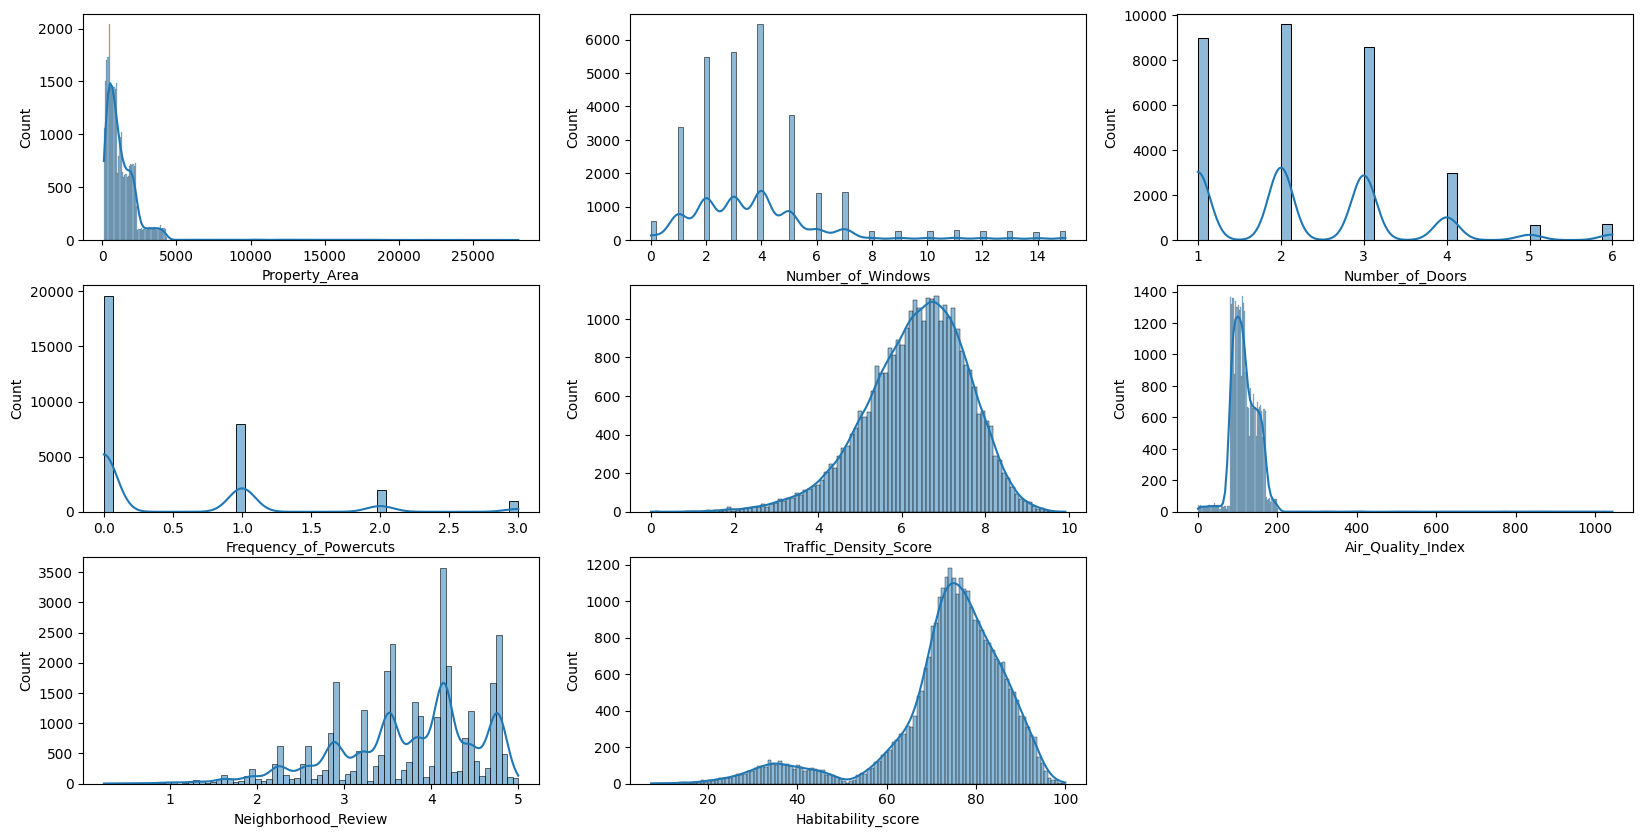

In [11]:
#Visualize the destribution of numerical data in graphical form
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train_data[col], kde=True)
    plt.xlabel(col)

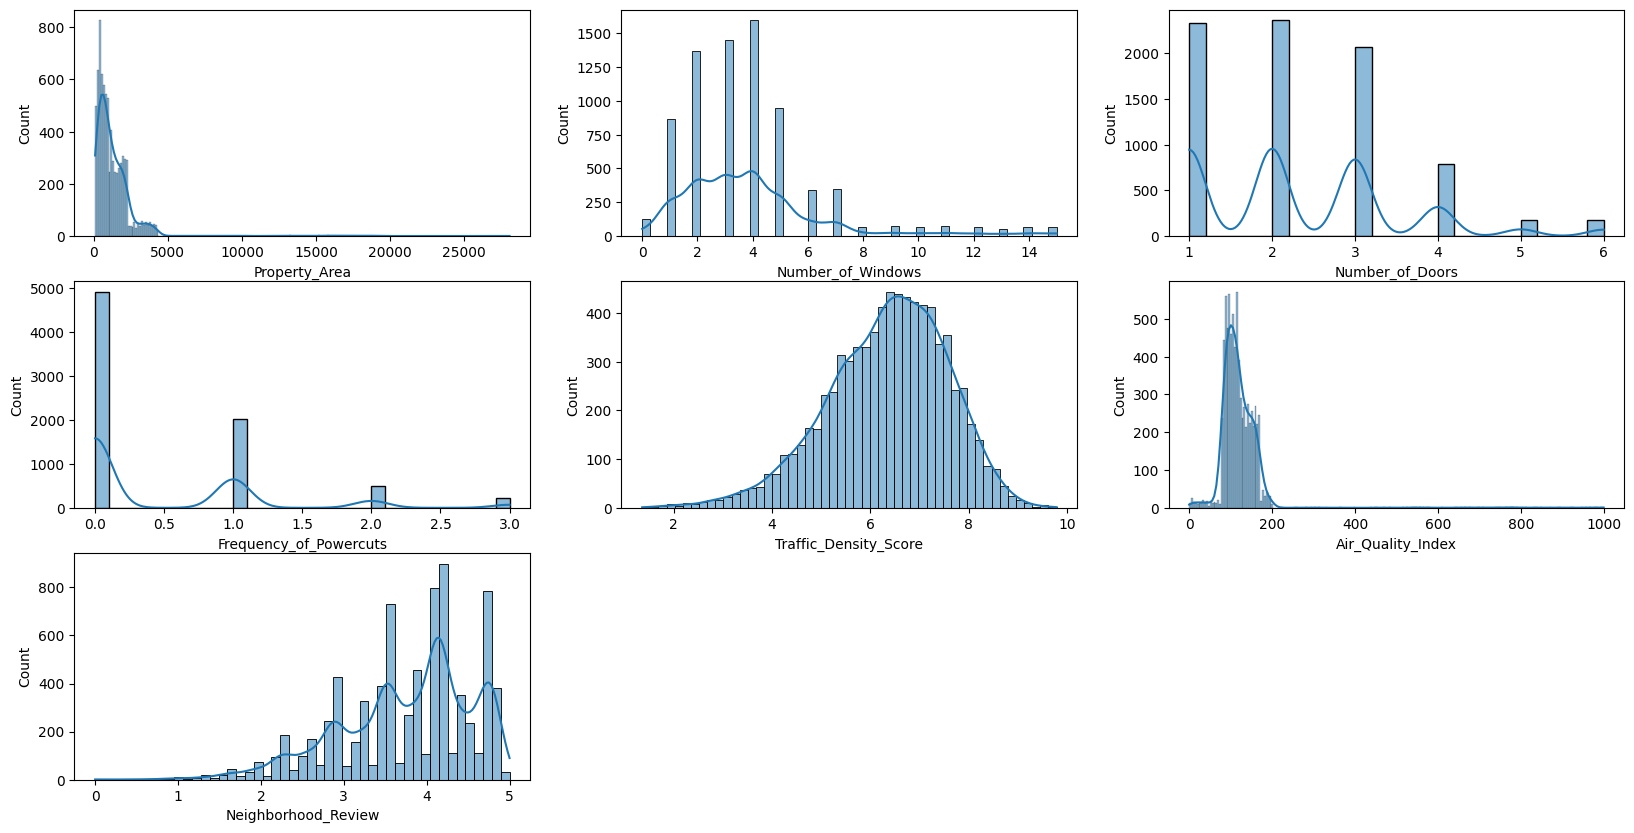

In [12]:
#Visualize the destribution of numerical data in graphical form
plt.figure(figsize=(20, 10))
for i, col in enumerate(test_numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(test_data[col], kde=True)
    plt.xlabel(col)

In [6]:
#find the number of missing values in the numercal columns in test and train data
missing_values = train_data[numerical_cols].isnull().sum()
missing_values

Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Frequency_of_Powercuts    0
Traffic_Density_Score     0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64

**Feature Scaling**

In [7]:
# Standardize the numerical columns in the train_data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data[test_numerical_cols] = scaler.fit_transform(train_data[test_numerical_cols])
test_data[test_numerical_cols] = scaler.transform(test_data[test_numerical_cols])

**Categorical Feature Encoding**

In [8]:
#Get the categorical columns in the train_data
categorical_cols = train_data.select_dtypes(include='object').columns.tolist()
categorical_cols

['Id',
 'Property_Type',
 'Furnishing',
 'Power_Backup',
 'Water_Supply',
 'Crime_Rate',
 'Dust_and_Noise']

In [19]:
#Get the number of missing values in the categorical columns
missing_values = train_data[categorical_cols].isnull().sum()
missing_values

Id                  0
Property_Type       0
Furnishing        828
Power_Backup        0
Water_Supply        0
Crime_Rate        629
Dust_and_Noise    999
dtype: int64

In [9]:
test_missing_values = test_data[categorical_cols].isnull().sum()
test_missing_values

Id                  0
Property_Type       0
Furnishing        214
Power_Backup        0
Water_Supply        0
Crime_Rate        158
Dust_and_Noise    220
dtype: int64

In [10]:
#Impute the missing values in the categorical columns with mode
for col in categorical_cols:
    mode = train_data[col].mode()[0]
    train_data[col].fillna(mode, inplace=True)
    test_data[col].fillna(mode, inplace=True)

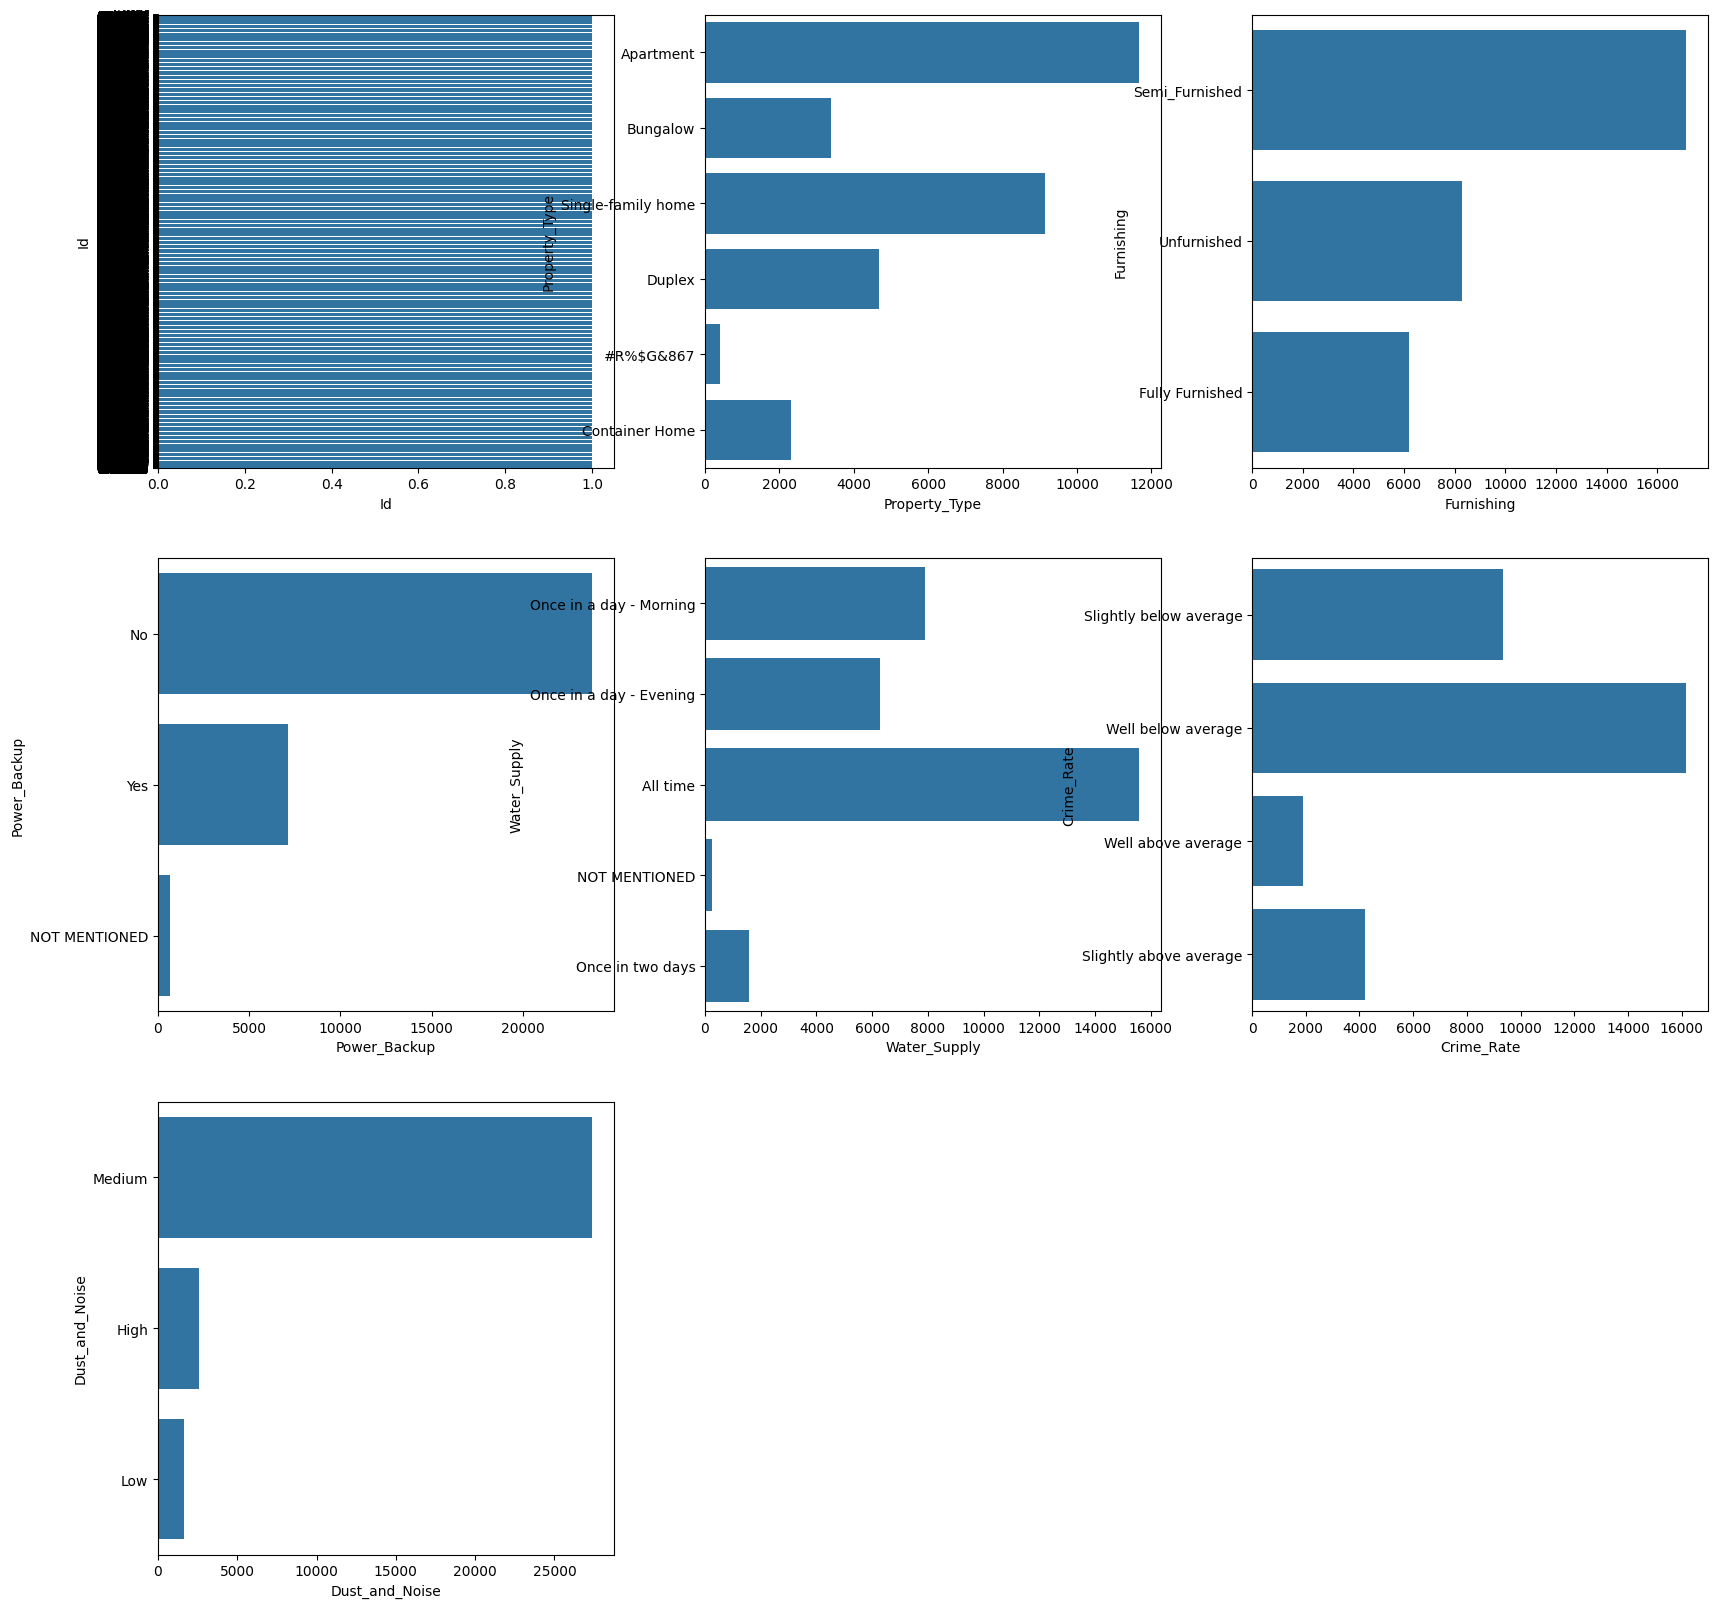

In [22]:
#Visualize the destribution of categorical data in graphical form
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(train_data[col])
    plt.xlabel(col)

In [24]:
#Displaying the unique values in the categorical columns
for col in categorical_cols:
    print(f'Column: {col}')
    print(col, train_data[col].unique())
    print('\n')

Column: Id
Id ['0x21e3' '0x68d4' '0x7d81' ... '0x8531' '0x2537' '0x89aa']


Column: Property_Type
Property_Type ['Apartment' 'Bungalow' 'Single-family home' 'Duplex' '#R%$G&867'
 'Container Home']


Column: Furnishing
Furnishing ['Semi_Furnished' 'Unfurnished' 'Fully Furnished']


Column: Power_Backup
Power_Backup ['No' 'Yes' 'NOT MENTIONED']


Column: Water_Supply
Water_Supply ['Once in a day - Morning' 'Once in a day - Evening' 'All time'
 'NOT MENTIONED' 'Once in two days']


Column: Crime_Rate
Crime_Rate ['Slightly below average' 'Well below average' 'Well above average'
 'Slightly above average']


Column: Dust_and_Noise
Dust_and_Noise ['Medium' 'High' 'Low']




In [26]:
for col in categorical_cols:
    print(f'Column: {col}')
    print(col, test_data[col].unique())
    print('\n')

Column: Id
Id ['0x6808' '0x6a98' '0xacc0' ... '0x9721' '0x7e25' '0x8cb4']


Column: Property_Type
Property_Type ['Single-family home' 'Apartment' 'Bungalow' 'Container Home' 'Duplex'
 '#R%$G&867']


Column: Furnishing
Furnishing ['Unfurnished' 'Semi_Furnished' 'Fully Furnished']


Column: Power_Backup
Power_Backup ['No' 'Yes' 'NOT MENTIONED']


Column: Water_Supply
Water_Supply ['All time' 'Once in a day - Morning' 'Once in a day - Evening'
 'Once in two days' 'NOT MENTIONED']


Column: Crime_Rate
Crime_Rate ['Well below average' 'Slightly below average' 'Slightly above average'
 'Well above average']


Column: Dust_and_Noise
Dust_and_Noise ['Medium' 'Low' 'High']




In [27]:
from scipy.stats import f_oneway

target = train_data['Habitability_score']

# Iterate through each categorical feature and perform ANOVA test
anova_results = {}
for cat_feature in train_data.select_dtypes(include='object').columns:
    groups = []
    for category in train_data[cat_feature].unique():
        groups.append(target[train_data[cat_feature] == category])
    anova_results[cat_feature] = f_oneway(*groups).pvalue

# Convert results to DataFrame for better visualization
anova_results_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['p_value'])

# Sort features based on p-values
anova_results_df = anova_results_df.sort_values(by='p_value')

# Display results
print("ANOVA Test Results:")
print(anova_results_df)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


ANOVA Test Results:
                      p_value
Furnishing       0.000000e+00
Power_Backup     0.000000e+00
Crime_Rate       0.000000e+00
Water_Supply    3.568362e-293
Dust_and_Noise  1.251727e-132
Property_Type   4.268328e-119
Id                        NaN


**According to the results of the ANOVA test, the Id column doesn't show any clear relationship with the target column.**

In [11]:
#Get the count of unique values in Id column
train_data['Id'].nunique()

31599

In [12]:
# drop the Id column from the datasets
train_data.drop('Id', axis=1, inplace=True)
test_data_copy = test_data.copy()
test_data.drop('Id', axis=1, inplace=True)

In [13]:
# One-hot encode 'Property_Type'
train_data = pd.get_dummies(train_data, columns=['Property_Type'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Property_Type'], drop_first=True)

In [31]:
train_data.head()

,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,-0.659552,1.684073e-16,-1.131916,Semi_Furnished,-0.656063,No,Once in a day - Morning,-0.382854,Slightly below average,Medium,-0.505529,0.158931,71.98,1,0,0,0,0
1,-0.338123,-7.304729e-01,-0.283241,Unfurnished,0.691963,No,Once in a day - Evening,-1.629394,Well below average,Medium,-0.408865,-0.229401,71.20,1,0,0,0,0
2,-0.336072,2.796596e-02,-0.283241,Fully Furnished,-0.656063,No,Once in a day - Morning,0.896489,Slightly below average,Medium,-0.006099,0.096297,71.39,1,0,0,0,0
3,-0.252511,-3.512535e-01,-0.283241,Unfurnished,2.039989,Yes,Once in a day - Morning,-0.161430,Well above average,Medium,-0.344423,-2.997826,31.46,1,0,0,0,0
4,0.433410,3.820161e+00,3.111459,Fully Furnished,-0.656063,No,All time,-0.735494,Well below average,Medium,-0.086652,1.298870,93.70,0,1,0,0,0


In [14]:
# Label encode 'Furnishing'
furnishing_mapping = {'Unfurnished': 0, 'Semi_Furnished': 1, 'Fully Furnished': 2}
train_data['Furnishing'] = train_data['Furnishing'].map(furnishing_mapping)
test_data['Furnishing'] = test_data['Furnishing'].map(furnishing_mapping)

In [33]:
train_data.head()

,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,-0.659552,1.684073e-16,-1.131916,1,-0.656063,No,Once in a day - Morning,-0.382854,Slightly below average,Medium,-0.505529,0.158931,71.98,1,0,0,0,0
1,-0.338123,-7.304729e-01,-0.283241,0,0.691963,No,Once in a day - Evening,-1.629394,Well below average,Medium,-0.408865,-0.229401,71.20,1,0,0,0,0
2,-0.336072,2.796596e-02,-0.283241,2,-0.656063,No,Once in a day - Morning,0.896489,Slightly below average,Medium,-0.006099,0.096297,71.39,1,0,0,0,0
3,-0.252511,-3.512535e-01,-0.283241,0,2.039989,Yes,Once in a day - Morning,-0.161430,Well above average,Medium,-0.344423,-2.997826,31.46,1,0,0,0,0
4,0.433410,3.820161e+00,3.111459,2,-0.656063,No,All time,-0.735494,Well below average,Medium,-0.086652,1.298870,93.70,0,1,0,0,0


In [15]:
# One-hot encode 'Power_Backup'
encoded_power_backup = pd.get_dummies(train_data['Power_Backup'], prefix='Power_Backup')
train_data.drop('Power_Backup', axis=1, inplace=True)
train_data = pd.concat([train_data, encoded_power_backup], axis=1)

In [16]:
encoded_power_backup = pd.get_dummies(test_data['Power_Backup'], prefix='Power_Backup')
test_data.drop('Power_Backup', axis=1, inplace=True)
test_data = pd.concat([test_data, encoded_power_backup], axis=1)

In [17]:
# One-hot encode 'Water_Supply' column
encoded_Water_Supply = pd.get_dummies(train_data['Water_Supply'], prefix='water_supply')
train_data.drop(columns=['Water_Supply'], inplace=True)
train_data = pd.concat([train_data, encoded_Water_Supply], axis=1)

In [18]:
encoded_Water_Supply = pd.get_dummies(test_data['Water_Supply'], prefix='water_supply')
test_data.drop(columns=['Water_Supply'], inplace=True)
test_data = pd.concat([test_data, encoded_Water_Supply], axis=1)

In [38]:
train_data.head()

,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,...,Property_Type_Duplex,Property_Type_Single-family home,Power_Backup_NOT MENTIONED,Power_Backup_No,Power_Backup_Yes,water_supply_All time,water_supply_NOT MENTIONED,water_supply_Once in a day - Evening,water_supply_Once in a day - Morning,water_supply_Once in two days
0,-0.659552,1.684073e-16,-1.131916,1,-0.656063,-0.382854,Slightly below average,Medium,-0.505529,0.158931,...,0,0,0,1,0,0,0,0,1,0
1,-0.338123,-7.304729e-01,-0.283241,0,0.691963,-1.629394,Well below average,Medium,-0.408865,-0.229401,...,0,0,0,1,0,0,0,1,0,0
2,-0.336072,2.796596e-02,-0.283241,2,-0.656063,0.896489,Slightly below average,Medium,-0.006099,0.096297,...,0,0,0,1,0,0,0,0,1,0
3,-0.252511,-3.512535e-01,-0.283241,0,2.039989,-0.161430,Well above average,Medium,-0.344423,-2.997826,...,0,0,0,0,1,0,0,0,1,0
4,0.433410,3.820161e+00,3.111459,2,-0.656063,-0.735494,Well below average,Medium,-0.086652,1.298870,...,0,0,0,1,0,1,0,0,0,0


In [19]:
# Label encode 'Crime_Rate' based on ordinal relationship
crime_rate_mapping = {'Well below average': 0, 'Slightly below average': 1, 'Slightly above average': 2, 'Well above average': 3}
train_data['Crime_Rate'] = train_data['Crime_Rate'].map(crime_rate_mapping)
test_data['Crime_Rate'] = test_data['Crime_Rate'].map(crime_rate_mapping)

In [20]:
#Label encode Dust_and_Noise
dust_and_noise_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
train_data['Dust_and_Noise'] = train_data['Dust_and_Noise'].map(dust_and_noise_mapping)
test_data['Dust_and_Noise'] = test_data['Dust_and_Noise'].map(dust_and_noise_mapping)

In [42]:
train_data.head()

,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,...,Property_Type_Duplex,Property_Type_Single-family home,Power_Backup_NOT MENTIONED,Power_Backup_No,Power_Backup_Yes,water_supply_All time,water_supply_NOT MENTIONED,water_supply_Once in a day - Evening,water_supply_Once in a day - Morning,water_supply_Once in two days
0,-0.659552,1.684073e-16,-1.131916,1,-0.656063,-0.382854,1,1,-0.505529,0.158931,...,0,0,0,1,0,0,0,0,1,0
1,-0.338123,-7.304729e-01,-0.283241,0,0.691963,-1.629394,0,1,-0.408865,-0.229401,...,0,0,0,1,0,0,0,1,0,0
2,-0.336072,2.796596e-02,-0.283241,2,-0.656063,0.896489,1,1,-0.006099,0.096297,...,0,0,0,1,0,0,0,0,1,0
3,-0.252511,-3.512535e-01,-0.283241,0,2.039989,-0.161430,3,1,-0.344423,-2.997826,...,0,0,0,0,1,0,0,0,1,0
4,0.433410,3.820161e+00,3.111459,2,-0.656063,-0.735494,0,1,-0.086652,1.298870,...,0,0,0,1,0,1,0,0,0,0


In [21]:
#Get the data types of the columns
train_data.dtypes

Property_Area                           float64
Number_of_Windows                       float64
Number_of_Doors                         float64
Furnishing                                int64
Frequency_of_Powercuts                  float64
Traffic_Density_Score                   float64
Crime_Rate                                int64
Dust_and_Noise                            int64
Air_Quality_Index                       float64
Neighborhood_Review                     float64
Habitability_score                      float64
Property_Type_Apartment                   uint8
Property_Type_Bungalow                    uint8
Property_Type_Container Home              uint8
Property_Type_Duplex                      uint8
Property_Type_Single-family home          uint8
Power_Backup_NOT MENTIONED                uint8
Power_Backup_No                           uint8
Power_Backup_Yes                          uint8
water_supply_All time                     uint8
water_supply_NOT MENTIONED              

In [22]:
test_data.dtypes

Property_Area                           float64
Number_of_Windows                       float64
Number_of_Doors                         float64
Furnishing                                int64
Frequency_of_Powercuts                  float64
Traffic_Density_Score                   float64
Crime_Rate                                int64
Dust_and_Noise                            int64
Air_Quality_Index                       float64
Neighborhood_Review                     float64
Property_Type_Apartment                   uint8
Property_Type_Bungalow                    uint8
Property_Type_Container Home              uint8
Property_Type_Duplex                      uint8
Property_Type_Single-family home          uint8
Power_Backup_NOT MENTIONED                uint8
Power_Backup_No                           uint8
Power_Backup_Yes                          uint8
water_supply_All time                     uint8
water_supply_NOT MENTIONED                uint8
water_supply_Once in a day - Evening    

In [23]:
#Get the columns with bool data type
bool_cols = [col for col in train_data.columns if train_data[col].dtype == 'bool']

#Convert the bool columns to int
for col in bool_cols:
    train_data[col] = train_data[col].astype(int)
    test_data[col] = test_data[col].astype(int)

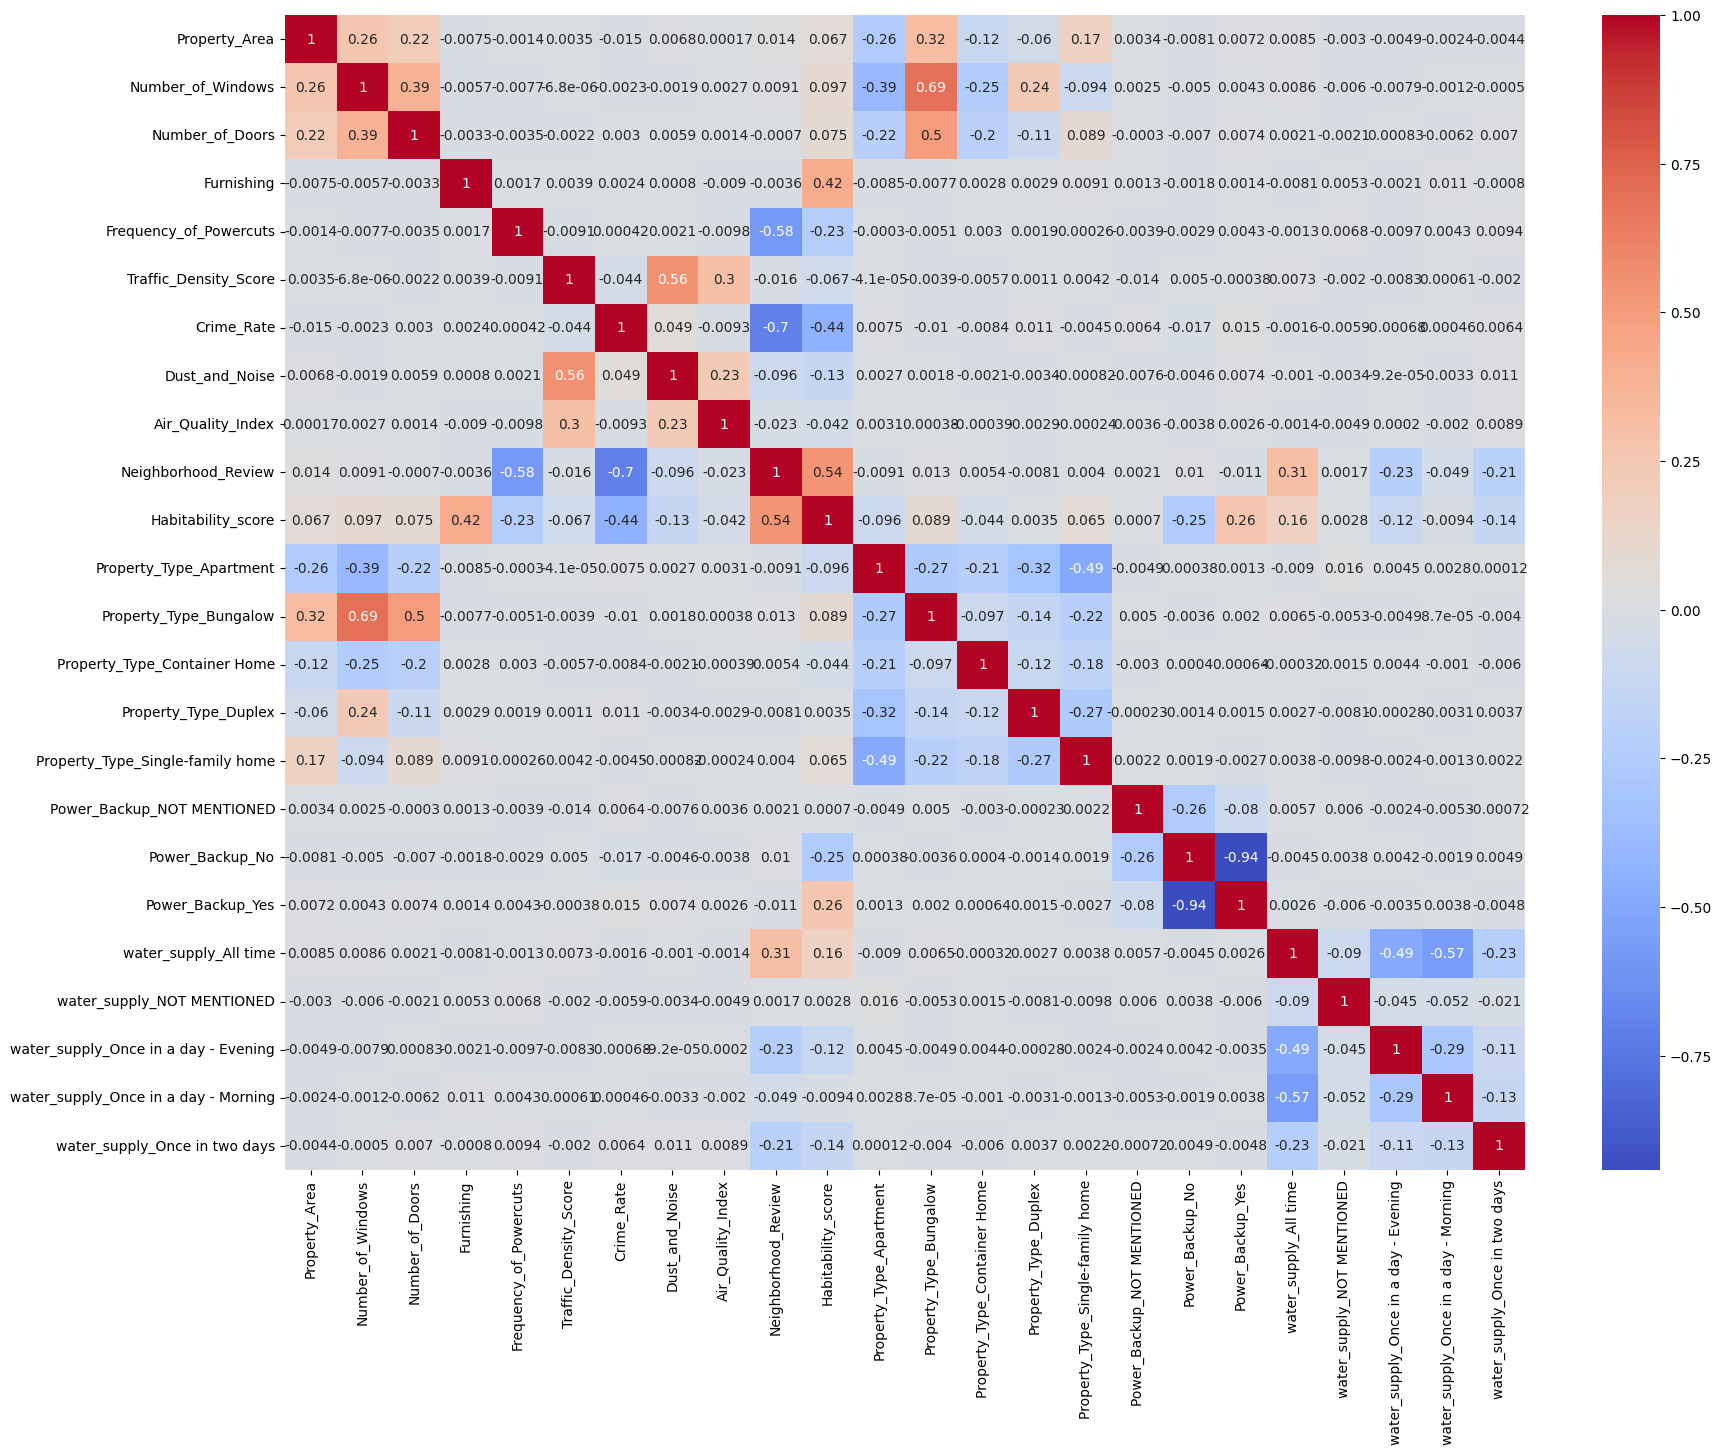

In [46]:
#Get the correlation heat map of train_data
plt.figure(figsize=(20, 15))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.show()

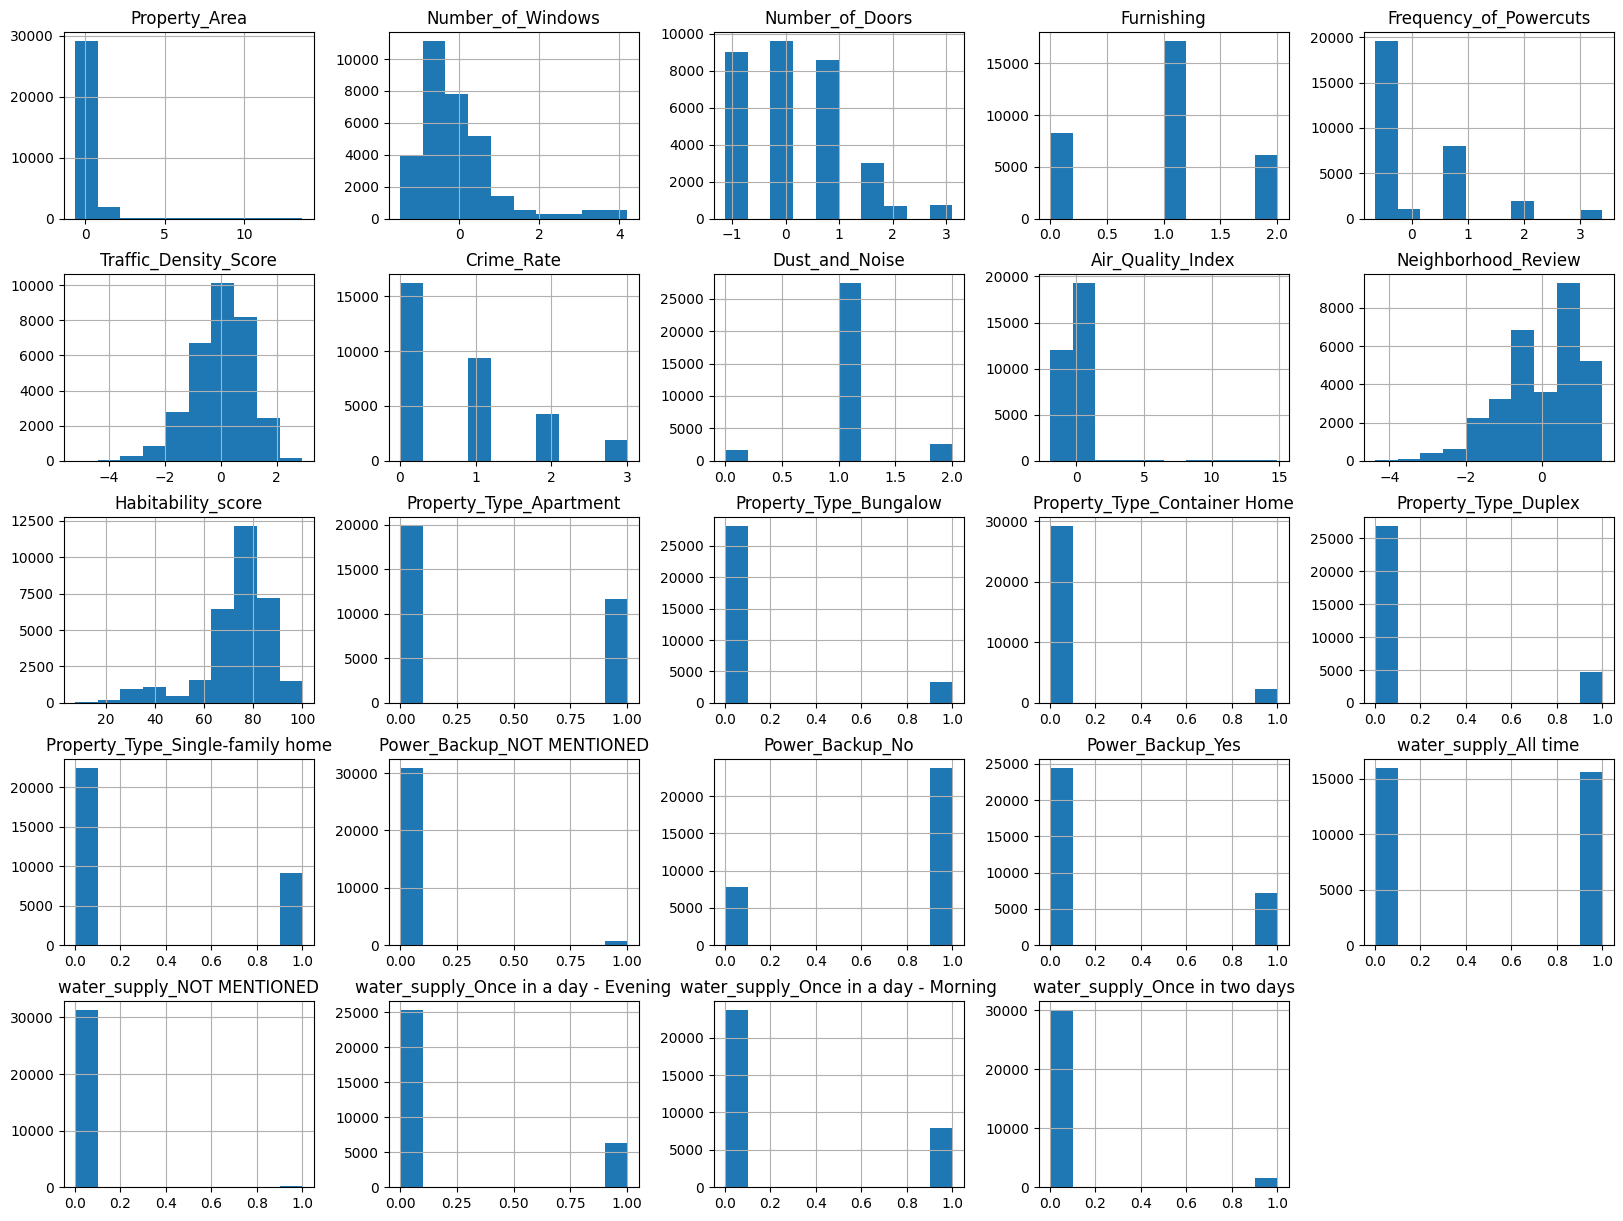

In [47]:
#Graphically represent the destribution of the features
train_data.hist(figsize=(20, 15))
plt.show()

**5.Train-test split**

In [24]:
X_train = train_data.drop('Habitability_score', axis=1)
y_train = train_data['Habitability_score']
X_test = test_data

In [25]:
features = X_train.columns.tolist()

In [26]:
#Arrange the columns in the test data in the same order as X_train
X_test = X_test[features]

**6.Model Selection**

In [65]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define the models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}

# Define hyperparameter grids for each model
param_grids = {
    'Linear Regression': {},
    'Lasso': {'alpha': [0.001, 0.01, 0.1, 1.0]},
    'ElasticNet': {'alpha': [0.001, 0.01, 0.1], 'l1_ratio': [0.1, 0.5, 0.9]},
    'DecisionTree': {'max_depth': [None, 5, 10, 20]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}
}

# Perform cross-validated grid search for each model
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

mean_nmse_scores = {}
mean_r2_scores = {}

# Evaluate models using cross-validation
for name, model in best_models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_nmse_score = cv_scores.mean()
    mean_nmse_scores[name] = mean_nmse_score

    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    mean_r2_score = cv_scores.mean()
    mean_r2_scores[name] = mean_r2_score

    print(f'{name}: Mean MSE on training data (cross-validation): {mean_nmse_score}')
    print(f'{name}: Mean R^2 on training data (cross-validation): {mean_r2_score}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Linear Regression: Mean MSE on training data (cross-validation): -84.44188167698493
Linear Regression: Mean R^2 on training data (cross-validation): 0.5779163246711819
Lasso: Mean MSE on training data (cross-validation): -84.43955921455589
Lasso: Mean R^2 on training data (cross-validation): 0.5779281108847795
ElasticNet: Mean MSE on training data (cross-validation): -84.43957272633916
ElasticNet: Mean R^2 on training data (cross-validation): 0.5779280497757693
DecisionTree: Mean MSE on training data (cross-validation): -43.85397577934891
DecisionTree: Mean R^2 on training data (cross-validation): 0.7805548038887272
RandomForest: Mea

**According to the above results, Random Forest Regressor performs well in this regression problem**

**Finding the best Random Forest Regressor using hyper parameter tunning**

**Approach 01 : Rnadom Forest Regressor**

In [73]:
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter distributions for randomized search
param_distributions = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [None, 5, 10],   # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2]     # Minimum number of samples required at each leaf node
}

# Create RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Perform randomized search with cross-validation
randomized_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions,
                                       n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
randomized_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = randomized_search.best_params_
print("Best hyperparameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


In [74]:
# Instantiate RandomForestRegressor with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)

# Train the final model on the entire training dataset
best_rf_model.fit(X_train, y_train)
best_rf_model.score(X_train, y_train)

0.9628852656817519

In [75]:
y_pred_best_model = best_rf_model.predict(X_test)
predicted_data_best_rf_model = pd.concat([test_data_copy['Id'].reset_index(drop=True), pd.Series(y_pred_best_model, name='Habitability_score')], axis=1)
predicted_data_best_rf_model.to_csv('predicted_data_best_rfr.csv', index=False)

**Approach 02 : Neural Network Algorithm**

Epoch 1/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1846.2109 - val_loss: 95.6498
Epoch 2/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 90.2888 - val_loss: 62.2939
Epoch 3/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 56.7443 - val_loss: 52.2926
Epoch 4/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 51.9929 - val_loss: 50.5211
Epoch 5/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48.6999 - val_loss: 47.0979
Epoch 6/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 46.0172 - val_loss: 45.0186
Epoch 7/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 44.9236 - val_loss: 43.0953
Epoch 8/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 41.6827 - val_loss: 41.3726
Epoch 9/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 41.6771 - val_loss: 39.7056
Epoch 10/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 40.0308 - val_loss: 40.0978
Epoch 11/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 38.5726 - val_loss: 39.0213
Epoch 12/100
790/

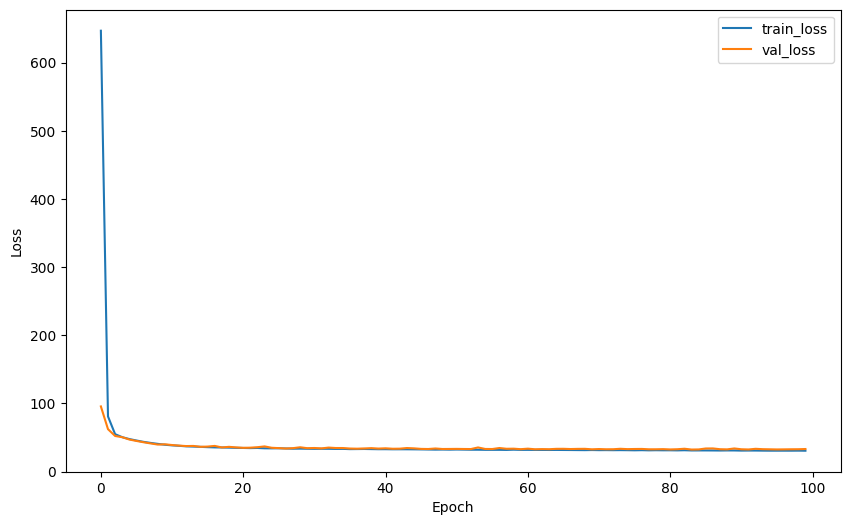

247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network architecture
model = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) #Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test data
y_pred_nn = model.predict(X_test)

In [28]:
y_pred_nn

array([[79.281334],
       [73.02028 ],
       [76.55488 ],
       ...,
       [81.044495],
       [70.26713 ],
       [83.10136 ]], dtype=float32)

In [29]:
y_pred_nn_1d = y_pred_nn.flatten()

In [30]:
y_pred_nn_1d

array([79.281334, 73.02028 , 76.55488 , ..., 81.044495, 70.26713 ,
       83.10136 ], dtype=float32)

In [31]:
predicted_data_nn = pd.concat([test_data_copy['Id'].reset_index(drop=True), pd.Series(y_pred_nn_1d, name='Habitability_score')], axis=1)
predicted_data_nn.to_csv('predicted_data_standardized_nn.csv', index=False)

Epoch 1/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0079 - val_loss: 0.0082
Epoch 2/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0077 - val_loss: 0.0083
Epoch 3/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0078 - val_loss: 0.0083
Epoch 4/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0077 - val_loss: 0.0083
Epoch 5/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0079 - val_loss: 0.0084
Epoch 6/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0077 - val_loss: 0.0082
Epoch 7/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0076 - val_loss: 0.0081
Epoch 8/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0075 - val_loss: 0.0082
Epoch 9/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0076 - val_loss: 0.0085
Epoch 10/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0074 - val_loss: 0.0081
Epoch 11/100
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0076 - val_loss: 0.0082
Epoch 12/100
790/790 ━━━━━━━━━━━━━━━━━━━━

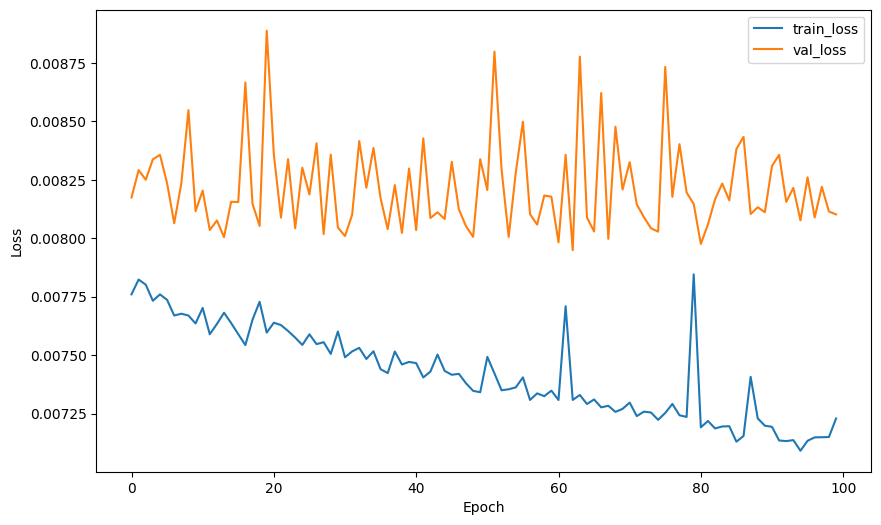

247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [37]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test data
y_pred_nn = model.predict(X_test)

Based on the above results, we can use the neural network as the best machine learning algorithm to predict the 'Habitability_Score' with a better accuracy rate.